In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-41bd99d1-8b45-a647-d37b-60a9f0a650ed)


In [ ]:
# Import tensorflow and pandas
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


# Get Data:

> Kaggle Dataset link: https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021/data





In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
!unzip -q archive.zip

## Inspect the Data

In [ ]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [ ]:
df.shape

(10409, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

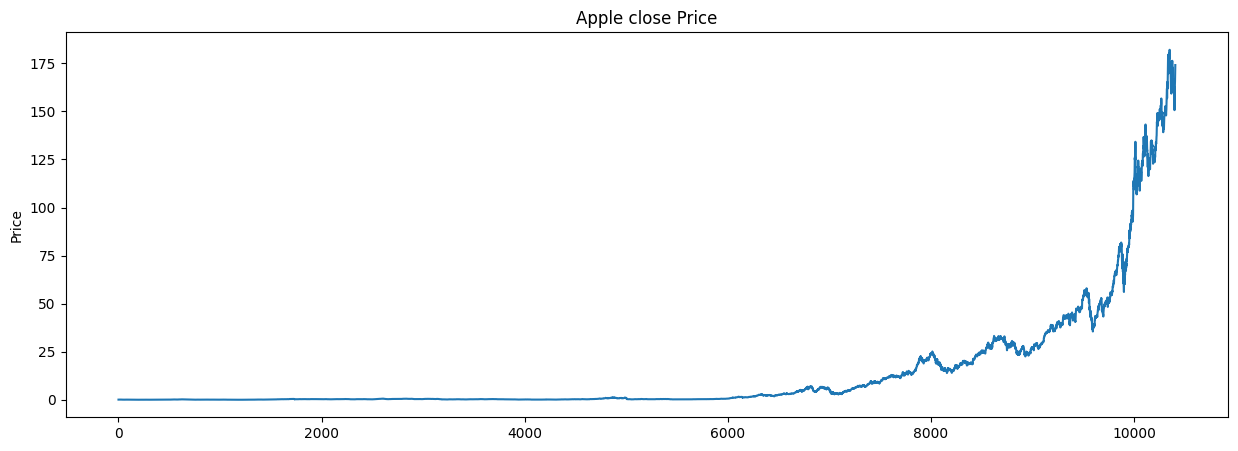

In [ ]:
# Plot close price for the apple stock
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Apple close Price')
plt.ylabel('Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

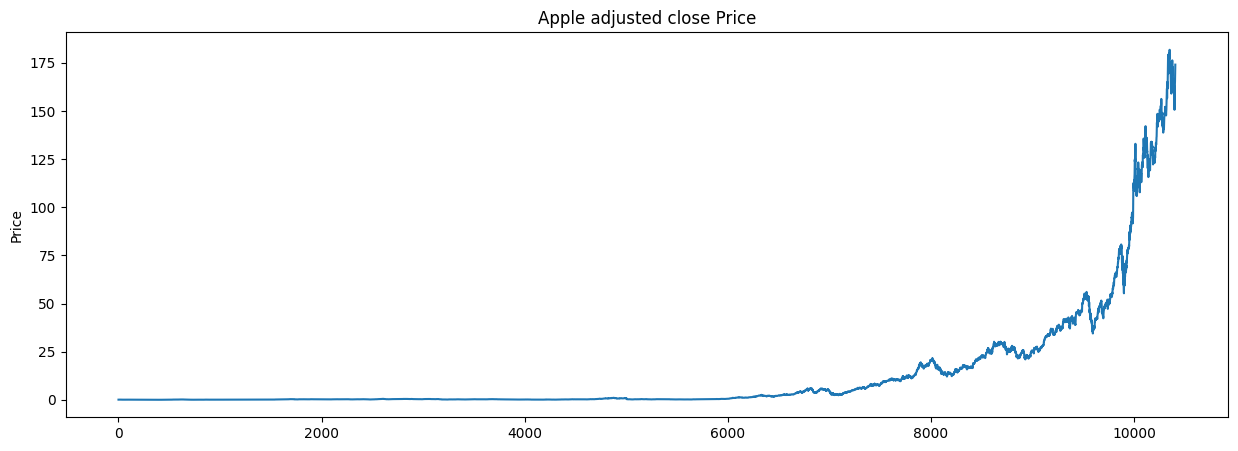

In [ ]:
#Plot the True Adj Close Value
plt.figure(figsize=(15,5))
plt.plot(df['Adj Close'])
plt.title('Apple adjusted close Price')
plt.ylabel('Price')
plt.show

We can see that the adjusted close price and close price are fairly close. I decided to just train the models on the closing price and not Adjusted close price.

In [ ]:
## Check for null values
df.isnull().sum()
  ## no null values in our data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

## Scaling the data
> getting all of our data between 0 and 1.

In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.000431,0.000433,0.000443,0.063198
1,0.000397,0.000397,0.000405,0.023699
2,0.000348,0.000348,0.000355,0.014246
3,0.000361,0.000363,0.000371,0.011647
4,0.000379,0.000381,0.000390,0.009897


## Split the data into training and test sets
> 80% training and 20% test.

In [ ]:
# split data into test and training sets using train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_transform, output_var, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)

(8327, 4) (2082, 4)


## LSTM needs that the data to be provided in the 3D form:

> we first transform the training and test data to NumPy arrays and then restructure them to match the format (Number of Samples, 1, Number of Features). Now, 8327 are the number of samples in the training set, which is 80% of 10409, and the number of features is 4. Therefore, the training set is reshaped to reflect this (8327, 1, 4). Likewise, the test set is reshaped.

In [ ]:
#Process the data for LSTM
x_train =np.array(x_train)
x_test =np.array(x_test)
x_train_LSTM = x_train.reshape(x_train.shape[0],1, x_train.shape[1])
x_test_LSTM = x_test.reshape(x_test.shape[0],1, x_test.shape[1])


# Building the LSTM Model

> In this step, we’ll build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

In [ ]:
# 1. Create the model
lstm = tf.keras.models.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, x_test_LSTM.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))

# 2. Compile the model
lstm.compile(optimizer='adam', loss='mean_squared_error')

# 3. Fit the model
history=lstm.fit(x_train_LSTM, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1041/1041 [==============================] - 7s 4ms/step - loss: 916.8102
Epoch 2/100
1041/1041 [==============================] - 6s 5ms/step - loss: 347.9244
Epoch 3/100
1041/1041 [==============================] - 4s 4ms/step - loss: 66.7132
Epoch 4/100
1041/1041 [==============================] - 4s 4ms/step - loss: 8.0611
Epoch 5/100
1041/1041 [==============================] - 5s 5ms/step - loss: 0.9417
Epoch 6/100
1041/1041 [==============================] - 4s 4ms/step - loss: 0.2775
Epoch 7/100
1041/1041 [==============================] - 5s 5ms/step - loss: 0.1800
Epoch 8/100
1041/1041 [==============================] - 5s 4ms/step - loss: 0.1661
Epoch 9/100
1041/1041 [==============================] - 4s 4ms/step - loss: 0.1625
Epoch 10/100
1041/1041 [==============================] - 5s 5ms/step - loss: 0.1603
Epoch 11/100
1041/1041 [==============================] - 4s 4ms/step - loss: 0.1580
Epoch 12/100
1041/1041 [==============================] - 4s 4ms/step

# Making predictions on the test set

In [ ]:
y_pred= lstm.predict(x_test_LSTM)

66/66 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[ 0.28674078],
       [ 0.43558216],
       [42.621784  ],
       ...,
       [40.777267  ],
       [ 0.22501326],
       [ 0.5874295 ]], dtype=float32)